# EDA-Gram


In [1]:
import os
import pandas as pd
import numpy as np
import pyphysio as ph
import matplotlib.pyplot as plt
from scipy import signal, fft
import pyphysio.estimators.Estimators as est

Please cite:
Bizzego et al. (2019) 'pyphysio: A physiological signal processing library for data science approaches in physiology', SoftwareX


### Estrazione della parte Phasic dal segnale iniziale

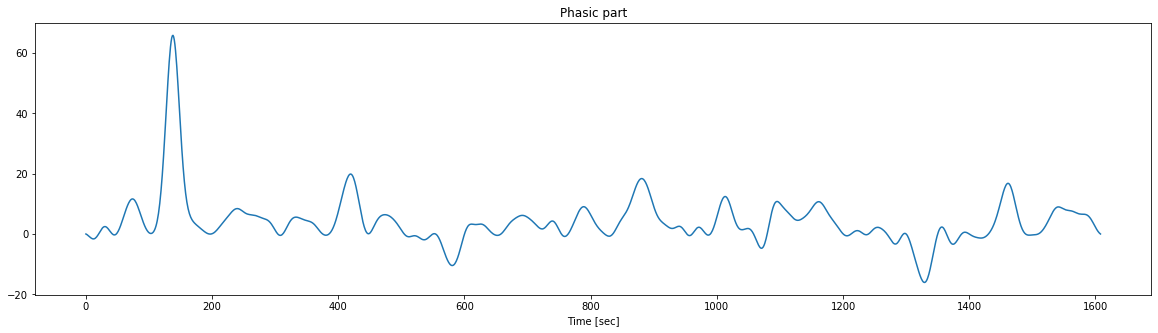

In [48]:
# prendo i dati eda di un soggetto e tengo la parte phasic

data = pd.read_csv('/Users/gioelepozzi/Desktop/PMEmo/code/eda_gram/1_EDA.csv', header=None)

subject = data.loc[0,1] # primo soggetto
eda = [] # vettore con i valori eda del primo soggetto
a = data.iloc[:,1]
for k in range(1,len(a)):
    eda.append(a[k])
    
# trasformazione del segnale per la libreria    
signal_p = ph.EvenlySignal(values = eda, sampling_freq = 50, signal_type = 'eda')
  
# phasic extraction
driver = est.DriverEstim()(signal_p)
phasic, tonic, _ = ph.PhasicEstim(delta=0.02)(driver)

plt.figure(figsize=(20,5))
plt.title('Phasic part')
plt.plot(phasic)

plt.show()

### Spettrogramma della parte phasic

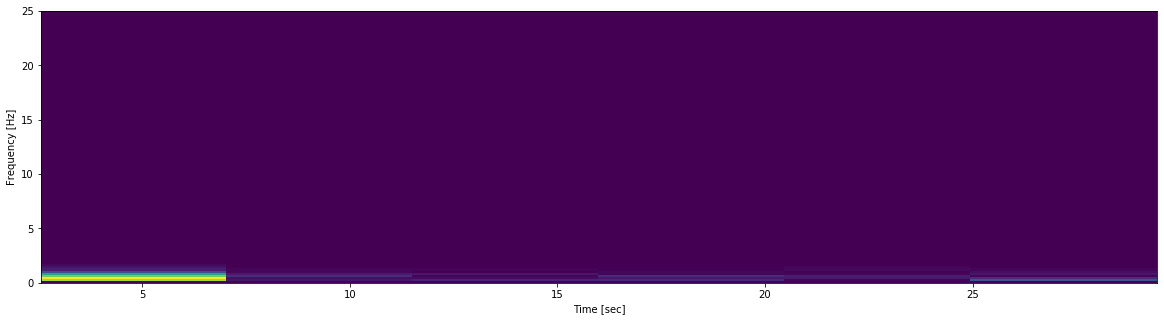

In [40]:
x = np.array(phasic) # rendere phasic un numpy array

fs = 50
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(20,5))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### Spettro della parte phasic del segnale

Text(0, 0.5, '|X(freq)|')

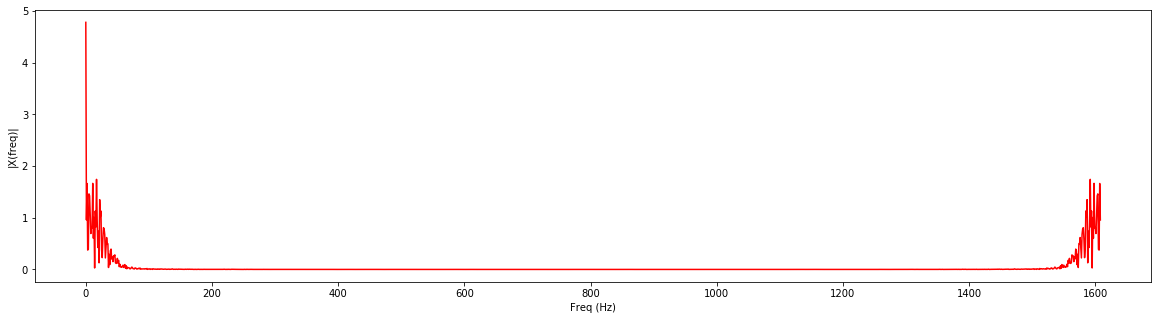

In [47]:
X = fft(x)/len(x)
plt.figure(figsize=(20,5))
plt.plot(abs(X),'r')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')

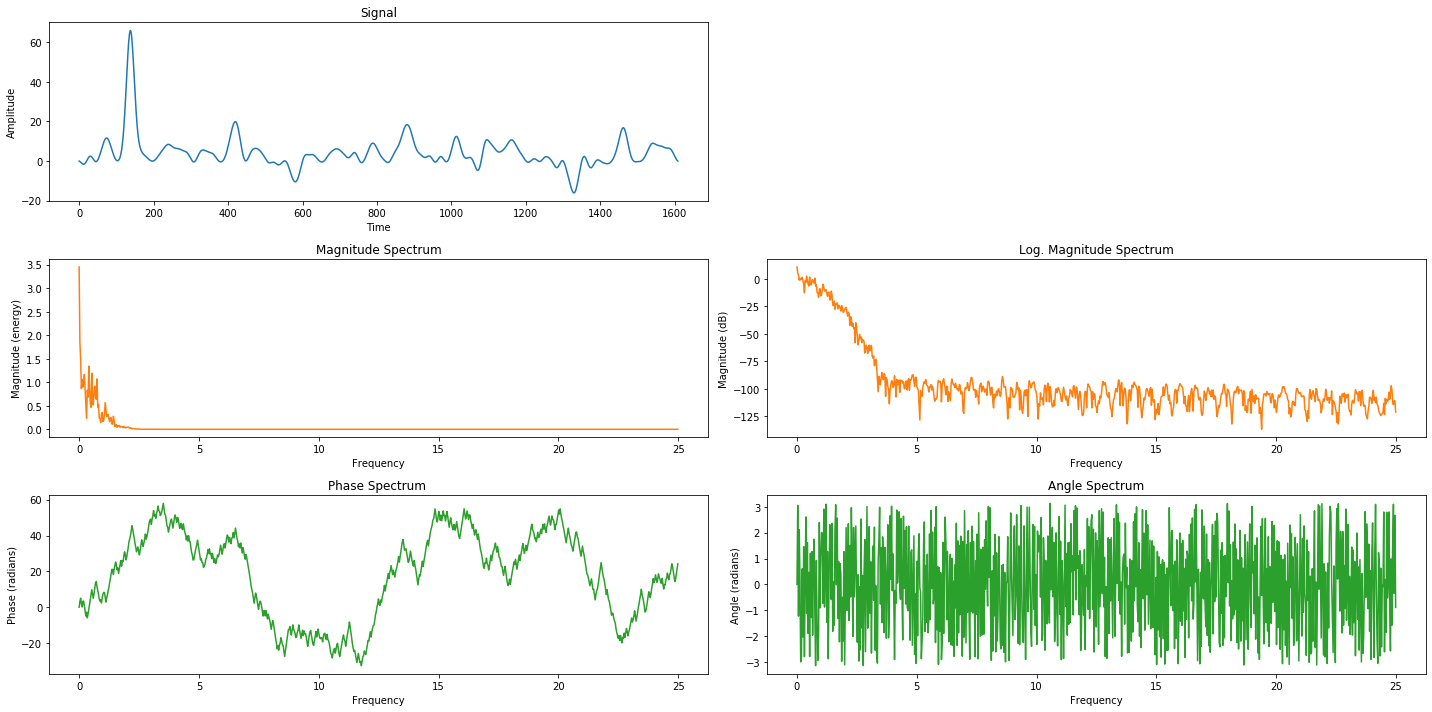

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(x, color='C0')
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(x, Fs=fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(x, Fs=fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(x, Fs=fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(x, Fs=fs, color='C2')

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

# Peak

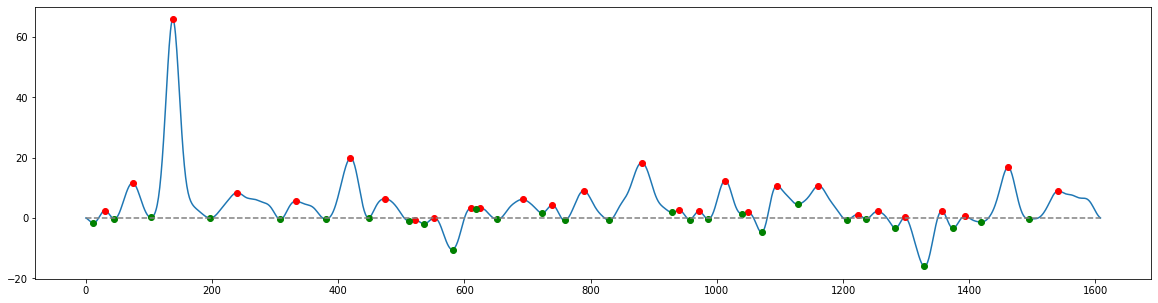

In [43]:
# Peak finder
from scipy.signal import find_peaks, peak_widths, argrelmin, argrelextrema

peaks, _ = find_peaks(phasic)
neg_peaks, _ = find_peaks(-phasic)

plt.figure(figsize=(20,5))
plt.plot(x)
plt.plot(peaks, x[peaks], "o", color='r')
plt.plot(neg_peaks, x[neg_peaks], "o", color='g')
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

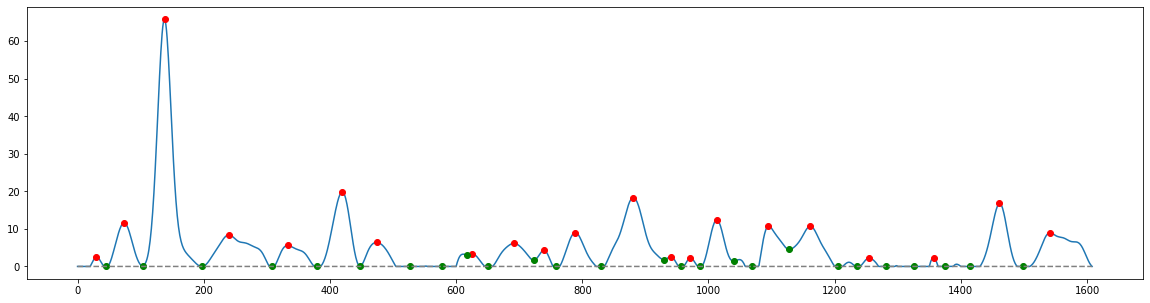

In [44]:
# tengo solo la parte positiva, può avere senso?
x[x < 0] = 0

# scelta dei picchi significativi?

peaks, _ = find_peaks(x, distance = 20, height = 2)
neg_peaks, _ = find_peaks(-x, distance = 20)


plt.figure(figsize=(20,5))
plt.plot(x)


plt.plot(peaks, x[peaks], "o", color='r')
plt.plot(neg_peaks, x[neg_peaks], "o", color='g')
plt.plot(np.zeros_like(x), "--", color="gray")

plt.show()

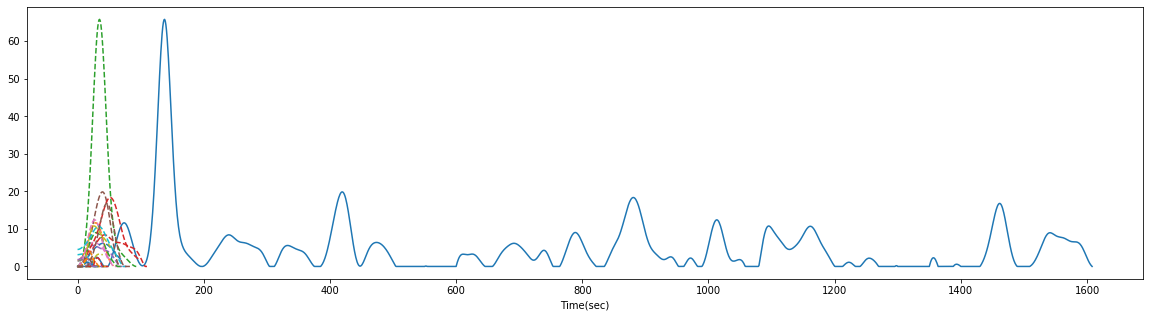

In [45]:
# dividere il segnale

plt.figure(figsize=(20,5))
plt.plot(x)

count=0
for i in range(0,25):
    phasic_atom = x[neg_peaks[count]:neg_peaks[count+1]]
    plt.plot(phasic_atom, '--')
    count=count+1


#phasic_atom_1 = x[neg_peaks[0]:neg_peaks[1]]
#plt.plot(phasic_atom_1, '--')
plt.xlabel('Time(sec)')
plt.show()

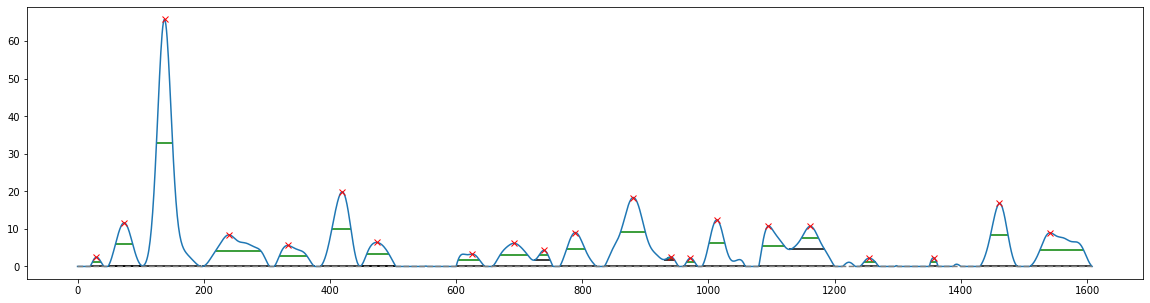

In [46]:
results_half = peak_widths(x, peaks, rel_height=0.5)
results_half[0]  # widths
results_full = peak_widths(x, peaks, rel_height=1)
results_full[0]  # widths

plt.figure(figsize=(20,5))
plt.plot(x)
plt.plot(peaks, x[peaks], "x", color='r')
plt.hlines(*results_half[1:], color="g")
plt.hlines(*results_full[1:], color="black")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

### PROVE

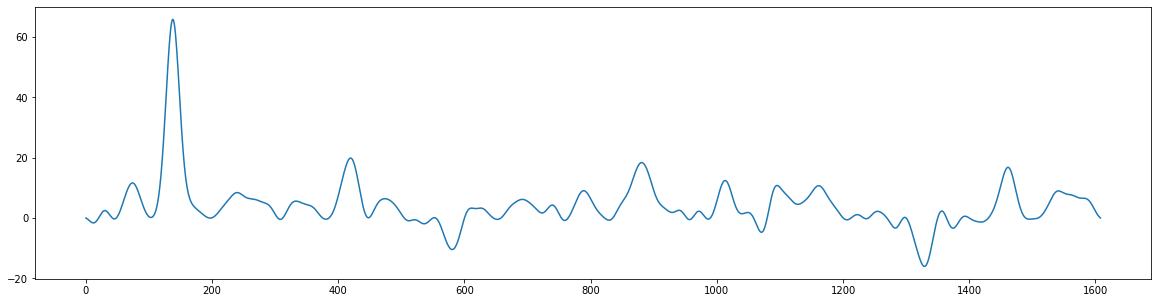

In [49]:
plt.figure(figsize=(20,5))
plt.plot(phasic)
plt.show()

In [134]:
from math import exp

# dividere il segnale in frames

# prendo il primo frame
x1 = phasic[0:128]
x2 = phasic[129:257]

P = len(x1)

a = [8, 14, 18]
b = [10, 15, 20]

mu = []
for i in range(0,160,10):
    mu.append(i)

aaa = []
for j in np.arange(0.100,0.145,0.005):
    aaa.append(j)
    s = np.around(s, decimals=3)

t=1
phi2 = (exp(-b[0]*(s[0]*t-mu[0]))-exp(-a[0]*(s[0]*t-mu[0]))) #*u(t-mu[0])
print(phi2)

-0.08144952294577923
